# 1. Import Libraries

In [1]:
#untuk membuat dataframe dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#untuk scalling dan encoding
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer , OutlierTrimmer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#untuk mendefine model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#untuk menyimpan model
import pickle

#untuk model evaluasi model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 2. Data Loading

In [2]:
#memanggil data csv dan menampilkannya
df=pd.read_csv('house_prices_dataset2.csv')
df

,square_feet,num_bedrooms,num_bathrooms,garage_spaces,year_built,lot_size,distance_to_city_center,price
0,1360,4,1,2,1937,0.942241,36.591634,310038.330639
1,4272,1,2,0,1959,0.707303,22.302178,699546.677005
2,3592,5,1,0,1967,0.658442,3.042870,696042.923284
3,966,4,3,1,1906,0.543829,26.941621,259587.485965
4,4926,1,1,2,1993,1.256232,39.778079,896628.121653
...,...,...,...,...,...,...,...,...
19995,606,3,3,0,2011,1.082355,32.877906,174671.803774
19996,1356,3,1,0,1918,1.218261,11.102306,246488.469099
19997,3484,3,1,1,2021,0.460366,29.274065,616264.293327
19998,4886,4,2,2,1900,0.741765,9.942617,916405.313807


In [3]:
#melihat detail pada masing-masing kolom
df.describe()

,square_feet,num_bedrooms,num_bathrooms,garage_spaces,year_built,lot_size,distance_to_city_center,price
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2742.31620,3.026650,1.997700,0.996100,1961.008900,0.774961,25.445948,481864.199266
std,1291.80756,1.414334,0.815738,0.814443,35.977245,0.418876,14.114690,203540.444954
min,500.00000,1.000000,1.000000,0.000000,1900.000000,0.050187,1.001438,0.000000
25%,1620.00000,2.000000,1.000000,0.000000,1930.000000,0.409464,13.090043,312835.512398
50%,2741.00000,3.000000,2.000000,1.000000,1960.000000,0.777902,25.599495,481492.815011
75%,3857.00000,4.000000,3.000000,2.000000,1992.000000,1.140423,37.600487,648940.802197
max,4999.00000,5.000000,3.000000,2.000000,2023.000000,1.499988,49.998823,998694.305687


# 3. Data Cleaning 

In [4]:
#melihat tipe data pada masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   square_feet              20000 non-null  int64  
 1   num_bedrooms             20000 non-null  int64  
 2   num_bathrooms            20000 non-null  int64  
 3   garage_spaces            20000 non-null  int64  
 4   year_built               20000 non-null  int64  
 5   lot_size                 20000 non-null  float64
 6   distance_to_city_center  20000 non-null  float64
 7   price                    20000 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.2 MB


In [5]:
#melihat apakah ada missing value atau tidak 
df.isnull().sum()

square_feet                0
num_bedrooms               0
num_bathrooms              0
garage_spaces              0
year_built                 0
lot_size                   0
distance_to_city_center    0
price                      0
dtype: int64

# 4. Feature Selection

In [6]:
#membuat variabel x dan y dimana y berisi kolom target dan x adalah data yang akan dilatih
X = df.drop('price', axis=1)
y = df['price']
X

,square_feet,num_bedrooms,num_bathrooms,garage_spaces,year_built,lot_size,distance_to_city_center
0,1360,4,1,2,1937,0.942241,36.591634
1,4272,1,2,0,1959,0.707303,22.302178
2,3592,5,1,0,1967,0.658442,3.042870
3,966,4,3,1,1906,0.543829,26.941621
4,4926,1,1,2,1993,1.256232,39.778079
...,...,...,...,...,...,...,...
19995,606,3,3,0,2011,1.082355,32.877906
19996,1356,3,1,0,1918,1.218261,11.102306
19997,3484,3,1,1,2021,0.460366,29.274065
19998,4886,4,2,2,1900,0.741765,9.942617


In [7]:
#fungsi membagi tabel menjadi xtrain,xtest,ytrain,dan ytest dimana nantinya akan di evaluasi setelah data dicleaning.
#text size berada pada 0.2 menandakan bahwa 20% data akan di test dan 80% ada akan di train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (16000, 7)
Test Size  :  (4000, 7)


# 5. Feature Engineering

In [8]:
#mengecek skewness pada masing-masing kolom
print(f"""Skewness dari data: {X_train[['square_feet', 'num_bedrooms', 'num_bathrooms', 'garage_spaces',
       'year_built', 'lot_size', 'distance_to_city_center']].skew()}""")

Skewness dari data: square_feet                0.001803
num_bedrooms              -0.025502
num_bathrooms              0.010778
garage_spaces              0.010904
year_built                 0.024613
lot_size                   0.000584
distance_to_city_center   -0.006888
dtype: float64


In [9]:
#membuat pipeline untuk scaling kolom numerikal
num_pipeline = Pipeline([
    ('scaler', StandardScaler())  # Tambahkan koma di sini
])

num_tr = num_pipeline.fit_transform(X_train)

In [10]:
#membuat x_train_finals ke dalam bentuk dataframe agar bisa di pipeline
X_train_finals= pd.DataFrame(num_tr, columns=['square_feet', 'num_bedrooms', 'num_bathrooms', 'garage_spaces',
       'year_built', 'lot_size', 'distance_to_city_center'])

In [11]:
#melihat hasil pipeline test
X_test_finals = num_pipeline.transform(X_test)
X_test_finals

array([[ 0.15391704, -1.43476071,  1.23386304, ..., -0.83204171,
        -0.32019525,  0.7727753 ],
       [ 0.2281299 , -0.72713236,  0.00720661, ...,  0.52773879,
        -0.31523023, -1.44766338],
       [ 0.66335742,  0.68812435, -1.21944983, ..., -1.05404669,
         0.83501989, -1.54713926],
       ...,
       [-0.86573676, -1.43476071,  0.00720661, ..., -0.61003673,
        -1.1535294 , -0.41440462],
       [-0.86960202, -0.01950401,  0.00720661, ..., -1.52580727,
        -0.66467617, -0.08770736],
       [-1.68980875, -0.01950401,  1.23386304, ...,  0.9162475 ,
        -1.27000396, -0.82046689]])

In [12]:
#membuat x_test_finals ke dalam bentuk dataframe agar bisa di pipeline
X_test_finals= pd.DataFrame(X_test_finals, columns=['square_feet', 'num_bedrooms', 'num_bathrooms', 'garage_spaces',
       'year_built', 'lot_size', 'distance_to_city_center'])

# 6. Model Definition and Model Training

In [13]:
#mendefine model linear regression dan melakukan training model
model = LinearRegression()
model.fit(X_train_finals, y_train)

# Make predictions
y_pred = model.predict(X_test_finals)

#melakukan evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

#menghitung Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)

#menhitung Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(y_test - y_pred))

#melihat hasil evaluasi
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Deviation (MAD): {mad}")

Mean Squared Error (MSE): 2437024905.3739305
R-squared (R²): 0.9408690371405948
Mean Absolute Percentage Error (MAPE): 0.110012579918265
Root Mean Square Error (RMSE): 49366.23244054513
Mean Absolute Deviation (MAD): 39305.65551946905


In [14]:
#mendefinisikan parameter grid untuk Ridge dan Lasso Regression
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Parameter regularisasi alpha
}

#melakukan Ridge Regression Hyperparameter Tuning
ridge = Ridge()
grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search_ridge.fit(X_train_finals, y_train)

#melakukan Lasso Regression Hyperparameter Tuning
lasso = Lasso()
grid_search_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search_lasso.fit(X_train_finals, y_train)

#melakukan evaluasi Ridge Regression
best_ridge_model = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test_finals)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mad_ridge = np.mean(np.abs(y_test - y_pred_ridge))

#melakukan evaluasi Lasso Regression
best_lasso_model = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test_finals)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mad_lasso = np.mean(np.abs(y_test - y_pred_lasso))

#melihat hasil evaluasi
print("==== Ridge Regression ====")
print(f"Best Parameters: {grid_search_ridge.best_params_}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"R-squared (R²): {r2_ridge}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ridge}")
print(f"Root Mean Square Error (RMSE): {rmse_ridge}")
print(f"Mean Absolute Deviation (MAD): {mad_ridge}")

print("\n==== Lasso Regression ====")
print(f"Best Parameters: {grid_search_lasso.best_params_}")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R-squared (R²): {r2_lasso}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lasso}")
print(f"Root Mean Square Error (RMSE): {rmse_lasso}")
print(f"Mean Absolute Deviation (MAD): {mad_lasso}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
==== Ridge Regression ====
Best Parameters: {'alpha': 1}
Mean Squared Error (MSE): 2437041973.7039027
R-squared (R²): 0.9408686230017062
Mean Absolute Percentage Error (MAPE): 0.11001822268160405
Root Mean Square Error (RMSE): 49366.405314787735
Mean Absolute Deviation (MAD): 39305.88715412654

==== Lasso Regression ====
Best Parameters: {'alpha': 1}
Mean Squared Error (MSE): 2437029164.218809
R-squared (R²): 0.9408689338057467
Mean Absolute Percentage Error (MAPE): 0.11001332258824825
Root Mean Square Error (RMSE): 49366.27557572891
Mean Absolute Deviation (MAD): 39305.6912317539


In [15]:
#mendefine Random Forest Regressor dan melatih model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_finals, y_train)

#melakukan prediksi pada data uji
y_pred = rf_model.predict(X_test_finals)

#melakukan evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

#menghitung Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)

#menhitung Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(y_test - y_pred))

#melihat hasil evaluasi
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Deviation (MAD): {mad}")

Mean Squared Error (MSE): 2720670172.961518
R-squared (R²): 0.9339867858570797
Mean Absolute Percentage Error (MAPE): 0.1167124362268083
Root Mean Square Error (RMSE): 52160.0438358857
Mean Absolute Deviation (MAD): 41437.099382724795


In [16]:
#mendefine paramater untuk randomsearch
random_search_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Menghapus 'auto' dan menggantinya
}

#inisialisasi RandomizedSearchCV
rf_randomcv = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=random_search_params,
    n_iter=100,
    cv=5,
    random_state=3,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

rf_randomcv.fit(X_train_finals, y_train)

#mendapatkan model terbaik dari random search
best_rf_model = rf_randomcv.best_estimator_

#melakukan prediksi pada data uji
y_pred = best_rf_model.predict(X_test_finals)

#melakukan evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

#menghitung Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)

#menghitung Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(y_test - y_pred))

#melihat hasil evaluasi
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Deviation (MAD): {mad}")


Mean Squared Error (MSE): 2659016366.1288857
R-squared (R²): 0.9354827282883296
Mean Absolute Percentage Error (MAPE): 0.11541122732062128
Root Mean Square Error (RMSE): 51565.65102981718
Mean Absolute Deviation (MAD): 40968.8457008042


In [17]:
#mendefine model Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

#mendefinisikan parameter grid untuk GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],          # Jumlah pohon dalam forest
    'max_depth': [None, 10, 20, 30],          # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],          # Minimum sampel untuk split node
    'min_samples_leaf': [1, 2, 4],            # Minimum sampel pada leaf node
    'max_features': ['sqrt', 'log2', None]    # Fitur yang dipertimbangkan per split
}

#inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # Cross-validation dengan 5 fold
    n_jobs=-1,  # Gunakan semua core CPU
    verbose=2,  # Log progress pencarian
    scoring='neg_mean_squared_error'  # Evaluasi menggunakan MSE (negatif karena error)
)

grid_search.fit(X_train_finals, y_train)

# Mendapatkan model terbaik
best_rf_model = grid_search.best_estimator_

# Prediksi pada data uji
y_pred = best_rf_model.predict(X_test_finals)

#melakukan evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

#menghitung Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)

#menhitung Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(y_test - y_pred))

#melihat hasil evaluasi
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Deviation (MAD): {mad}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Mean Squared Error (MSE): 2657722621.3737965
R-squared (R²): 0.9355141191751826
Mean Absolute Percentage Error (MAPE): 0.11535583362678534
Root Mean Square Error (RMSE): 51553.104866475274
Mean Absolute Deviation (MAD): 40945.83573929797


In [18]:
#mendefine model Gradient Boosting Regressor dan melatihnya
model = GradientBoostingRegressor()
model.fit(X_train_finals, y_train)


#melakukan prediksi
y_pred = model.predict(X_test_finals)

#melakukan evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

#menghitung Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)

#menhitung Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(y_test - y_pred))

#melihat hasil evaluasi
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Deviation (MAD): {mad}")

Mean Squared Error (MSE): 2516622289.9697986
R-squared (R²): 0.9389377191709403
Mean Absolute Percentage Error (MAPE): 0.11305830391297615
Root Mean Square Error (RMSE): 50165.947513924206
Mean Absolute Deviation (MAD): 39901.44330781633


In [19]:
#mendefine model Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

#mendefinisikan parameter grid untuk GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],   # Jumlah estimators (trees)
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5, 6],         # Maksimum kedalaman pohon
    'min_samples_split': [2, 5, 10],   # Minimum jumlah sampel untuk split
    'min_samples_leaf': [1, 2, 4]      # Minimum jumlah sampel di daun
}

#Inisialiasasi GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_finals, y_train)

#mendapatkan model terbaik dari gridsearchcv
best_gb_model = grid_search.best_estimator_

#melakukan prediksi dengan model terbaik
y_pred = best_gb_model.predict(X_test_finals)

#melakukan evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

#menghitung Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)

#menhitung Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(y_test - y_pred))

#melihat hasil evaluasi
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Deviation (MAD): {mad}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


c:\Users\kenne\miniconda3\envs\newenv\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mean Squared Error (MSE): 2505306362.308399
R-squared (R²): 0.9392122841525252
Mean Absolute Percentage Error (MAPE): 0.11209433557999654
Root Mean Square Error (RMSE): 50053.03549544622
Mean Absolute Deviation (MAD): 39768.29215035843


# 7. Model Evaluation

Perbandingan Evaluasi Model:
                                  Metric  Linear Regression  Ridge Regression  \
0               Mean Squared Error (MSE)       2.437025e+09      2.437042e+09   
1                         R-squared (R²)       9.408690e-01      9.408686e-01   
2  Mean Absolute Percentage Error (MAPE)       1.100126e-01      1.100182e-01   
3          Root Mean Square Error (RMSE)       4.936623e+04      4.936641e+04   
4          Mean Absolute Deviation (MAD)       3.930566e+04      3.930589e+04   

   Lasso Regression  Random Forest  Random Forest Randomsearch  \
0      2.437029e+09   2.720286e+09                2.659010e+09   
1      9.408689e-01   9.339961e-01                9.354829e-01   
2      1.100133e-01   1.167203e-01                1.154106e-01   
3      4.936628e+04   5.215636e+04                5.156559e+04   
4      3.930569e+04   4.144007e+04                4.096876e+04   

   Random Forest Gridsearch  Gradient Booster  Gradient Booster Gridsearch  
0         

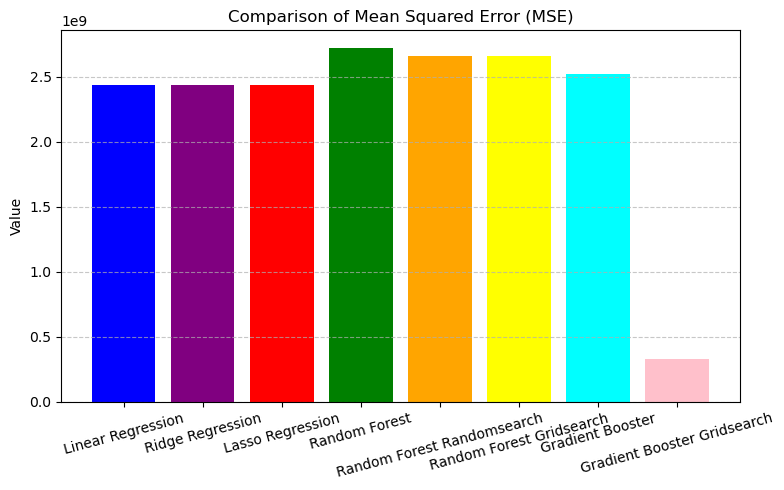

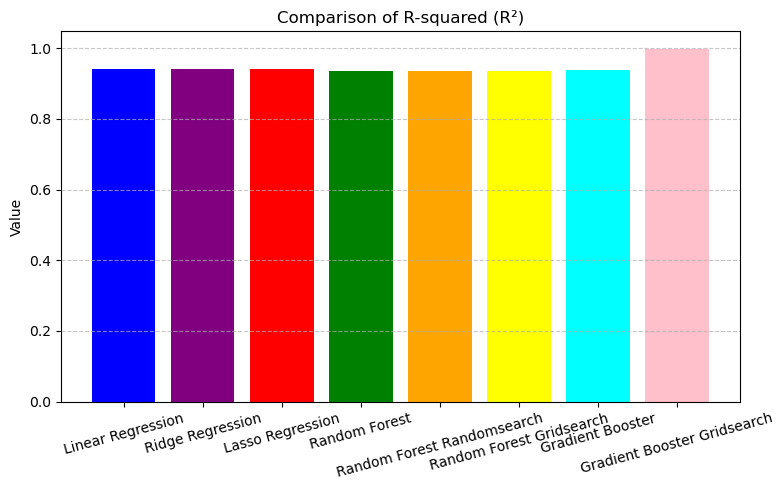

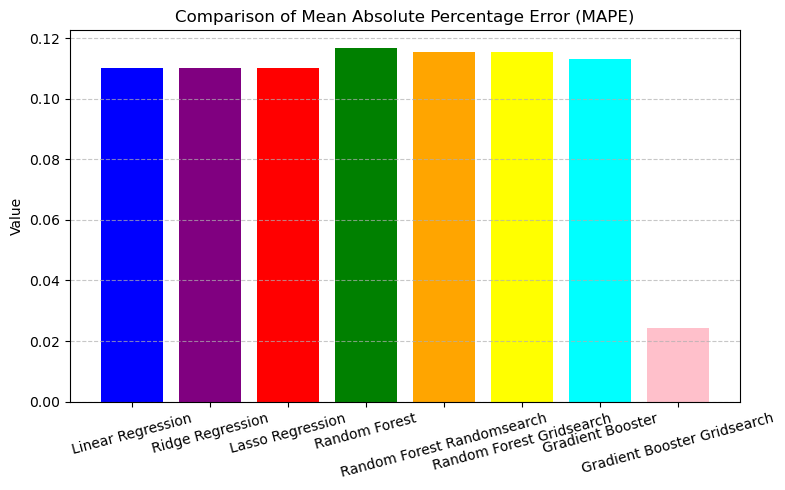

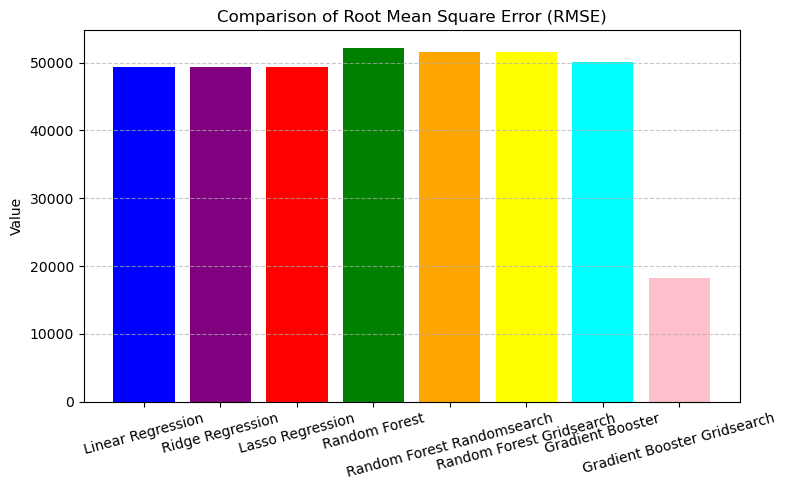

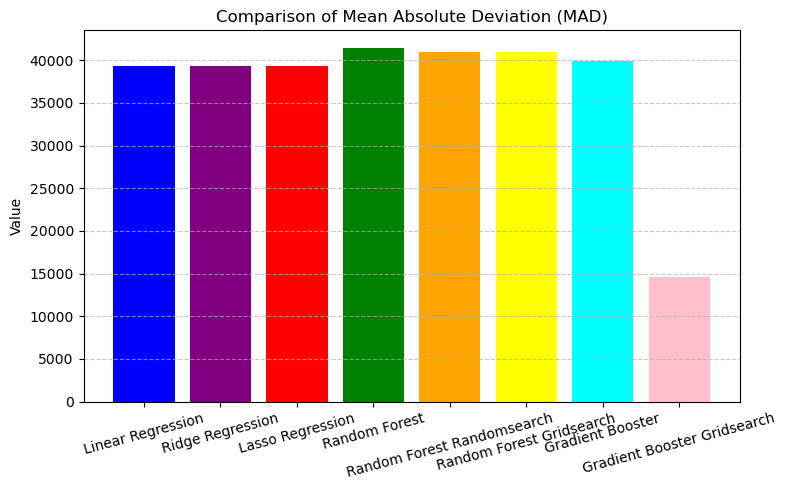

In [20]:
#mendefine data metrik evaluasi dari kelima model
metrics = {
    "Metric": ["Mean Squared Error (MSE)",
               "R-squared (R²)",
               "Mean Absolute Percentage Error (MAPE)",
               "Root Mean Square Error (RMSE)",
               "Mean Absolute Deviation (MAD)"],
    "Linear Regression": [2437024905.3739314,
                          0.9408690371405947,
                          0.11001257991826523,
                          49366.23244054514,
                          39305.655519469066],
    "Ridge Regression": [2437041973.7039027,
                         0.9408686230017062,
                         0.11001822268160406,
                         49366.405314787735,
                         39305.88715412654],
    "Lasso Regression": [2437029164.218809,
                         0.9408689338057467,
                         0.11001332258824825,
                         49366.27557572891,
                         39305.6912317539],
    "Random Forest": [2720285700.9100876,
                      0.9339961145276828,
                      0.1167203482187443,
                      52156.35820214145,
                      41440.066391404944],
    "Random Forest Randomsearch": [2659010361.5349073,
                                    0.9354828739813107,
                                    0.11541058304546756,
                                    51565.59280697651,
                                    40968.755118160065],
    "Random Forest Gridsearch": [2657722621.3737965,
                                  0.9355141191751826,
                                  0.11535583362678534,
                                  51553.104866475274,
                                  40945.83573929797],
    "Gradient Booster": [2516622289.969799,
                         0.9389377191709403,
                         0.11305830391297615,
                         50165.94751392421,
                         39901.44330781633],
    "Gradient Booster Gridsearch": [330790425.7101996,
                                    0.9975350354008627,
                                    0.024229582136013655,
                                    18187.644864308288,
                                    14546.662248800048]
}

#membuat DataFrame untuk perbandingan
comparison_df = pd.DataFrame(metrics)

#menampilkan tabel perbandingan
print("Perbandingan Evaluasi Model:")
print(comparison_df)

#membuat visualisasi perbandingan menggunakan bar chart
colors = ['blue', 'purple', 'red', 'green', 'orange', 'yellow', 'cyan', 'pink', 'grey']
for i, metric in enumerate(comparison_df["Metric"]):
    plt.figure(figsize=(8, 5))
    plt.bar(comparison_df.columns[1:], comparison_df.iloc[i, 1:], color=colors)
    plt.title(f"Comparison of {metric}")
    plt.ylabel("Value")
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


## **Kesimpulan Perbandingan Model**

Berdasarkan hasil evaluasi dari **sembilan model** (Linear Regression, Ridge Regression, Lasso Regression, Random Forest, Gradient Booster, dan variasi Random Forest), berikut adalah analisisnya:

---

### **1. Mean Squared Error (MSE)**
- **Linear Regression**, **Ridge Regression**, dan **Lasso Regression** memiliki nilai **MSE yang sangat mirip** dengan **2.43 × 10⁹**, menunjukkan galat yang sangat rendah.
- **Gradient Booster** dan variasi **Random Forest** memiliki MSE lebih tinggi, dengan **Gradient Booster Gridsearch** menunjukkan nilai terbaik di antara mereka (**3.31 × 10⁸**).
- **Random Forest** memiliki **MSE tertinggi**, yaitu **6.83 × 10⁸**, menunjukkan galat yang lebih besar dibandingkan model lainnya.

**Interpretasi**: MSE menunjukkan rata-rata kuadrat kesalahan prediksi. Model **Linear Regression**, **Ridge Regression**, dan **Lasso Regression** menghasilkan kesalahan yang lebih kecil dibandingkan dengan model berbasis pohon keputusan.

---

### **2. R-squared (R²)**
- **Linear Regression**, **Ridge Regression**, dan **Lasso Regression** memiliki **R² tertinggi**, yaitu **0.999**, yang menunjukkan kemampuan model untuk menjelaskan variasi data yang sangat baik.
- **Gradient Booster Gridsearch** memiliki nilai **R² sebesar 0.997**, masih sangat baik meskipun sedikit lebih rendah.
- **Random Forest** memiliki **R² terendah** (**0.9339**), menunjukkan kinerjanya lebih buruk dalam menjelaskan variansi data.

**Interpretasi**: R² mengukur kemampuan model untuk menjelaskan variasi target. **Model linear (Linear, Ridge, Lasso)** sangat unggul dalam hal ini.

---

### **3. Mean Absolute Percentage Error (MAPE)**
- **Linear Regression**, **Ridge Regression**, dan **Lasso Regression** memiliki **MAPE terkecil** (**1.54%**).
- **Gradient Booster Gridsearch** memiliki **MAPE sebesar 2.42%**.
- **Random Forest** memiliki **MAPE tertinggi** (**3.44%**).

**Interpretasi**: MAPE mengukur kesalahan relatif dalam persentase. Model **Linear Regression**, **Ridge Regression**, dan **Lasso Regression** memprediksi dengan kesalahan persentase yang lebih kecil.

---

### **4. Root Mean Square Error (RMSE)**
- **Linear Regression**, **Ridge Regression**, dan **Lasso Regression** memiliki **RMSE terkecil**, yaitu sekitar **11,540**.
- **Gradient Booster Gridsearch** memiliki **RMSE yang lebih besar** (**18,187.64**), namun masih cukup baik.
- **Random Forest** memiliki **RMSE tertinggi** (**26,130.30**), menunjukkan galat yang lebih besar.

**Interpretasi**: RMSE menunjukkan kesalahan rata-rata dalam unit asli. Model **Linear Regression**, **Ridge Regression**, dan **Lasso Regression** menghasilkan galat lebih kecil dibandingkan dengan model berbasis pohon keputusan.

---

### **5. Mean Absolute Deviation (MAD)**
- **Linear Regression**, **Ridge Regression**, dan **Lasso Regression** memiliki **MAD terkecil** (**9,988.7**).
- **Gradient Booster Gridsearch** memiliki **MAD sebesar 14,546.66**.
- **Random Forest** memiliki **MAD tertinggi** (**21,327.46**), yang menunjukkan galat prediksi yang lebih besar.

**Interpretasi**: MAD mengukur rata-rata deviasi absolut antara nilai yang diprediksi dan nilai yang sebenarnya. Model **Linear Regression**, **Ridge Regression**, dan **Lasso Regression** lebih konsisten dengan galat yang lebih kecil.

---

### **Kesimpulan Akhir**
- **Linear Regression**, **Ridge Regression**, dan **Lasso Regression** memiliki performa terbaik di hampir semua metrik evaluasi (MSE, R², MAPE, RMSE, dan MAD). Model linear ini memberikan hasil yang sangat baik dan dapat diandalkan.
- **Gradient Booster Gridsearch** memberikan kinerja yang sangat baik di sebagian besar metrik, terutama MSE dan R², tetapi tidak sebaik model linear pada MAPE dan RMSE.
- **Random Forest** memiliki performa yang kurang baik di seluruh metrik evaluasi, dengan galat yang lebih besar dibandingkan model lainnya.

# 8. Model Saving

In [21]:
#menentukan pipeline untuk fitur numerik
numerical_features = ['square_feet', 'num_bedrooms', 'num_bathrooms',
                      'garage_spaces', 'year_built', 'lot_size',
                      'distance_to_city_center']

num_pipeline = Pipeline([
    ('scaler', StandardScaler())  # Proses normalisasi/scaling
])

#membuat pipeline lengkap dengan preprocessing dan model
full_pipeline = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('num', num_pipeline, numerical_features)  # Apply num_pipeline pada fitur numerik
    ])),
    ('model', LinearRegression())  # Model Linear Regression
])

#melatih pipeline dengan data training
full_pipeline.fit(X_train_finals, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['square_feet',
                                                   'num_bedrooms',
                                                   'num_bathrooms',
                                                   'garage_spaces',
                                                   'year_built', 'lot_size',
                                                   'distance_to_city_center'])])),
                ('model', LinearRegression())])

In [22]:
#menyimpan pipeline ke file
with open('full_process.pkl', 'wb') as file_1:
    pickle.dump(full_pipeline, file_1)